# Loading Data

In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [2]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 4.9 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import feature_engine

In [5]:
print(feature_engine.__version__)

1.5.2


In [6]:
import sklearn

In [7]:
print(sklearn.__version__)

1.2.1


In [8]:
"""Importing the required packages"""

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# save and load models
import joblib

# Pathlib to navigate file system
from pathlib import Path
import sys

# For splitting the dataset
from sklearn.model_selection import train_test_split

# For categorical variables
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import DecisionTreeEncoder
# For scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer

# creating pipelines 
from sklearn.pipeline import Pipeline

# Using Support Vector Machines as models
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Using KNN classification for our data
from sklearn.neighbors import KNeighborsClassifier

# draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# We will use this to download the Dataset
from sklearn.datasets import fetch_openml

# feature engine log transformation
from feature_engine.transformation import LogTransformer
from feature_engine.outliers import Winsorizer
from scipy.stats import uniform, truncnorm, randint, loguniform

# feature engine wrapper 
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.selection import DropFeatures, DropDuplicateFeatures
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

In [9]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path('/content/drive/MyDrive')

In [11]:
save_model_folder = base_folder/'models'
save_model_folder.mkdir(exist_ok=True, parents=True)

In [12]:
df= pd.read_csv("/content/drive/MyDrive/heart_dataset.csv")

#<font color = 'pickle'> EDA

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###<font color = 'pickle'> Column names and it's data types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###<font color = "pickle"> Summary Statistics

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###<font color='pickle'> Checking for missing values

In [16]:
df.isna().mean()*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

- Looks like there is no missing values problem in the data.

###<font color='pickle'> Checking for duplicate values

In [17]:
dups=df.duplicated()
print(dups.any())

True


- Looks there are few duplicate rows so we will drop them.

###<font color='pickle'> Data Distribution

In [18]:
categorical = [var for var in df if df[var].dtype=="category"]

discrete = [var for var in df if df[var].dtype!="category" and len(df[var].unique())<15 and var not in ['target']]

continuous = [ var for var in df if df[var].dtype != "category" and var not in discrete and var not in ['target']]


In [19]:
categorical

[]

In [20]:
discrete

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [21]:
continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

###<font color='pickle'> Continuous data Distribution

In [22]:

def continuous_plots(var):
  plt.figure(figsize=(16,4))

  #Histogram Plot
  plt.subplot(1,3,1)
  sns.histplot(df[var],bins=30)
  plt.title("Histogram")

  #Box Plot
  plt.subplot(1,3,2)
  sns.boxplot(y=df[var])
  plt.title("Box Plot")

  #Q-Q Plot
  plt.subplot(1,3,3)
  stats.probplot(df[var],dist="norm",plot=plt)
  plt.title("Q-Q plot")

  plt.show()


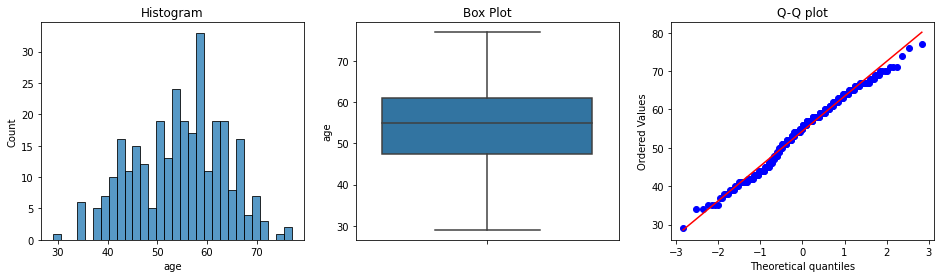

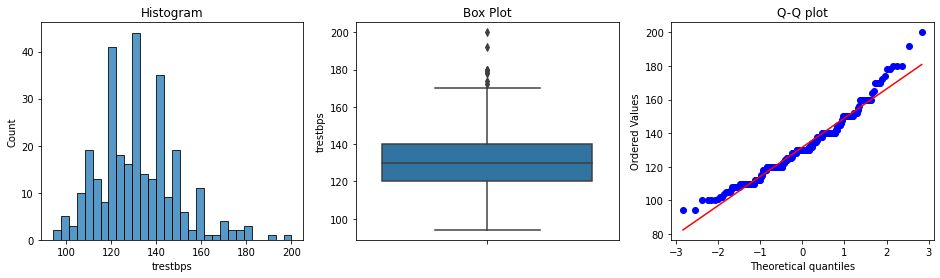

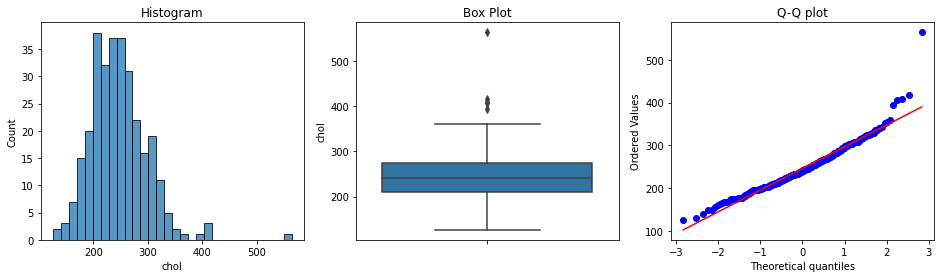

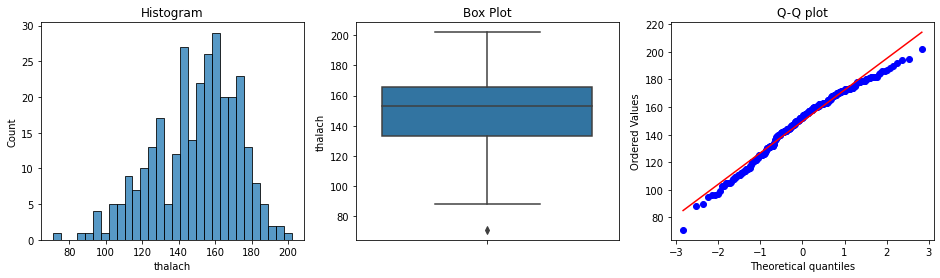

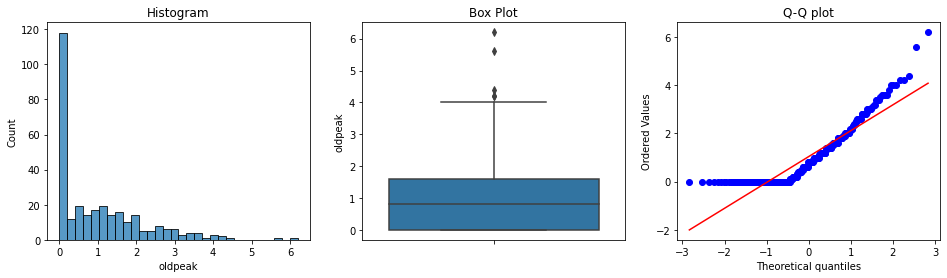

In [23]:
for x in continuous:
  continuous_plots(x)

- From the above plots it is clear that variables like trestbps, cholestrol are having skewness and hence need log transformation.
- Old peak Variable is having lots of zero values and having non standard distribution hence we will use K-Bins Discretizer on top of it.
- Trestbps and chol variables are having outliers  so we will use Winsorization technique to trest them.


## Feature Selection


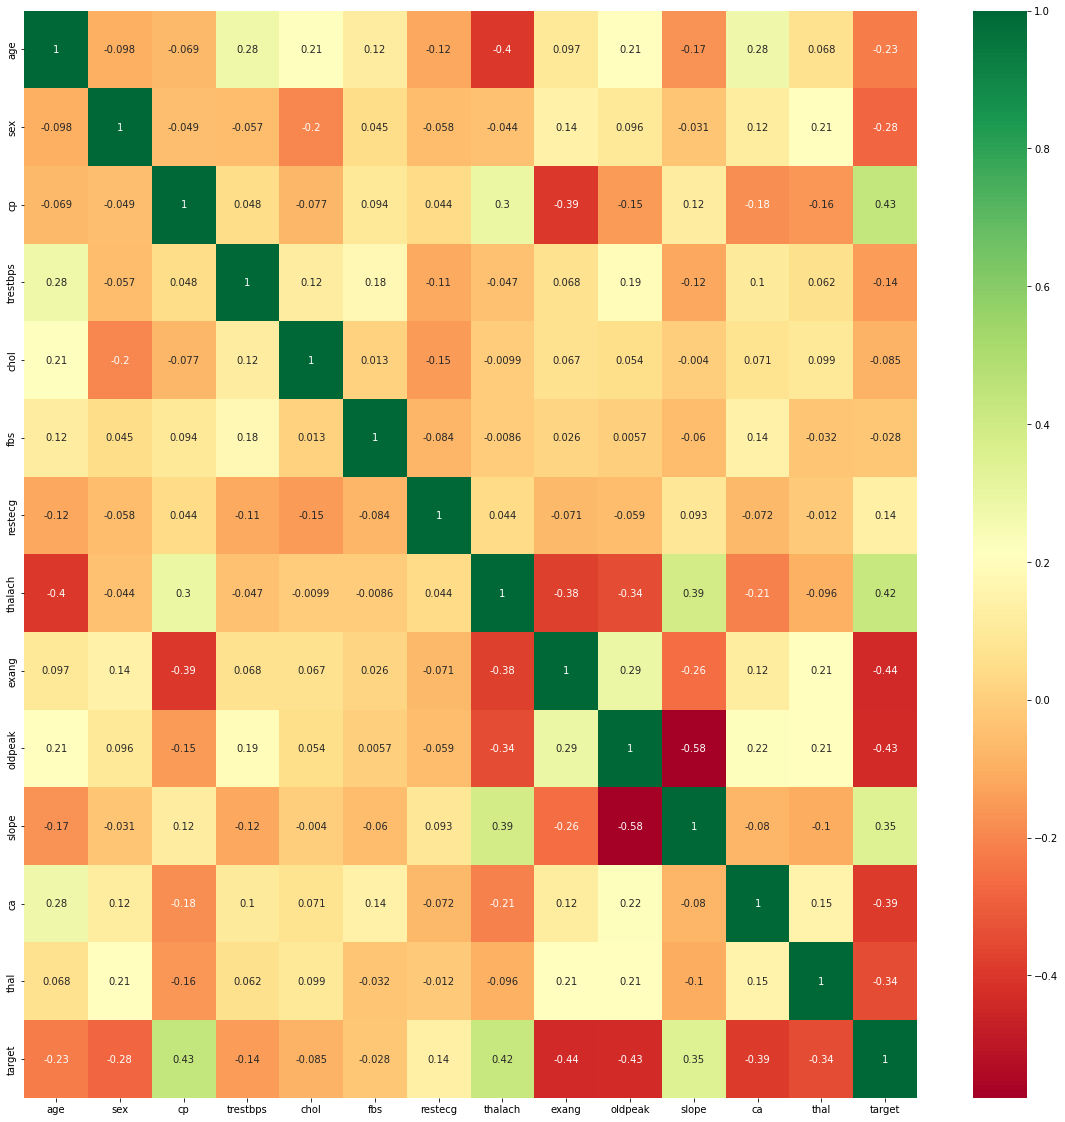

In [24]:
import seaborn as sns
correlations = df.corr()
top_corr_features = correlations.index
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### From the above it looks like variables are not suffering from high levels of multi collinearity.

In [25]:
X=df.drop('target',1)
y=df['target']

<ipython-input-25-280b20eab748>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df.drop('target',1)


In [26]:

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

#<font color='pickle'> Pipeline 1

In [31]:
pipeline_1=Pipeline([('drop_duplicates',DropDuplicateFeatures()),
                    ('log_transformer',LogTransformer(variables=['trestbps','chol','thalach'])),
                     ('bins_discretizer',SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans' ), 
                               variables = ['oldpeak'])),
                    ('outlier',Winsorizer(variables=['trestbps','chol'])),
                    ('onehotencoding',OneHotEncoder(variables=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'],ignore_format=True)),
                    ('scalar',SklearnTransformerWrapper(StandardScaler(),variables=continuous)),
                    ('knn',KNeighborsClassifier())])

# Hyper Parameter Tuning

In [32]:
param_grid_1={'knn__n_neighbors':range(1,21),
            'scalar__transformer': [StandardScaler(), MinMaxScaler()]
            }

In [33]:
random_search_fit_1=RandomizedSearchCV(pipeline_1,param_distributions=param_grid_1,cv=5)

In [34]:
random_search_fit_1.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('drop_duplicates',
                                              DropDuplicateFeatures()),
                                             ('log_transformer',
                                              LogTransformer(variables=['trestbps',
                                                                        'chol',
                                                                        'thalach'])),
                                             ('bins_discretizer',
                                              SklearnTransformerWrapper(transformer=KBinsDiscretizer(encode='ordinal',
                                                                                                     n_bins=10,
                                                                                                     strategy='kmeans'),
                                                                        variables=['oldpeak'])),
                                             ('outlier',
                                              Winsorizer(variables=['t...
                                              OneHotEncoder(ignore_format=True,
                                                            variables=['sex',
                                                                       'cp',
                                                                       'fbs',
                                                                       'restecg',
                                                                       'exang',
                                                                       'slope',
                                                                       'ca',
                                                                       'thal'])),
                                             ('scalar',
                                              SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                        variables=['age',
                                                                                   'trestbps',
                                                                                   'chol',
                                                                                   'thalach',
                                                                                   'oldpeak'])),
                                             ('knn', KNeighborsClassifier())]),
                   param_distributions={'knn__n_neighbors': range(1, 21),
                                        'scalar__transformer': [StandardScaler(),
                                                                MinMaxScaler()]})

In [35]:
print(random_search_fit_1.best_params_)

{'scalar__transformer': StandardScaler(), 'knn__n_neighbors': 10}


In [36]:
file_best_estimator_round1 = save_model_folder / 'knn_round1_best_estimator.pkl'
file_complete_grid_round1 = save_model_folder / 'knn_round1_complete_grid.pkl'

In [37]:
joblib.dump(random_search_fit_1.best_estimator_, file_best_estimator_round1)
joblib.dump(random_search_fit_1, file_complete_grid_round1)

['/content/drive/MyDrive/models/knn_round1_complete_grid.pkl']

In [38]:
loaded_best_estimator_round1 = joblib.load(file_best_estimator_round1)
loaded_complete_grid_round1 = joblib.load(file_complete_grid_round1)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

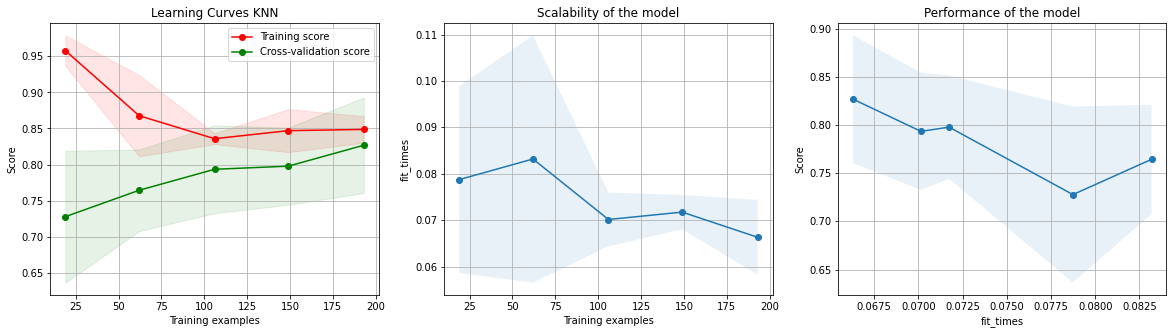

In [40]:
plot_learning_curve(loaded_best_estimator_round1, 'Learning Curves KNN', X_train, y_train, n_jobs=-1)

In [41]:
#let's check the train scores
print(loaded_best_estimator_round1.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round1.best_score_)

0.8512396694214877
0.8267857142857142


#<font color="pickle">Pipeline 2

In [42]:
from sklearn.ensemble import RandomForestClassifier
pipeline_2=Pipeline([('drop_duplicates',DropDuplicateFeatures()),
                    
                    ('rf',RandomForestClassifier())])

In [43]:
# now we create the grid with all the parameters that we would like to test.

param_grid_2= {
    'rf__n_estimators' :[100,200,300],
    'rf__max_features' : ["sqrt", "log2",None],
    'rf__max_depth': np.arange(2,10),
    'rf__max_leaf_nodes': np.arange(2, 10),
    
    }

   
     
# now we set up the grid search with cross-validation
random_rf_1 = RandomizedSearchCV(pipeline_2, param_grid_2,
                           cv=5, return_train_score= True, n_jobs=-1, n_iter=500)

In [44]:
random_rf_1.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('drop_duplicates',
                                              DropDuplicateFeatures()),
                                             ('rf', RandomForestClassifier())]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'rf__max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'rf__max_features': ['sqrt', 'log2',
                                                             None],
                                        'rf__max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'rf__n_estimators': [100, 200, 300]},
                   return_train_score=True)

In [45]:
print(random_rf_1.best_params_)

{'rf__n_estimators': 100, 'rf__max_leaf_nodes': 9, 'rf__max_features': 'sqrt', 'rf__max_depth': 5}


In [46]:
file_best_estimator_rf_round1 = save_model_folder / 'rf_round1_best_estimator.pkl'
file_complete_grid_rf_round1 = save_model_folder / 'rf_round1_complete_grid.pkl'

In [47]:
joblib.dump(random_rf_1.best_estimator_, file_best_estimator_round1)
joblib.dump(random_rf_1, file_complete_grid_round1)

['/content/drive/MyDrive/models/knn_round1_complete_grid.pkl']

In [48]:
loaded_best_estimator_rf_round1 = joblib.load(file_best_estimator_round1)
loaded_complete_grid_rf_round1 = joblib.load(file_complete_grid_round1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

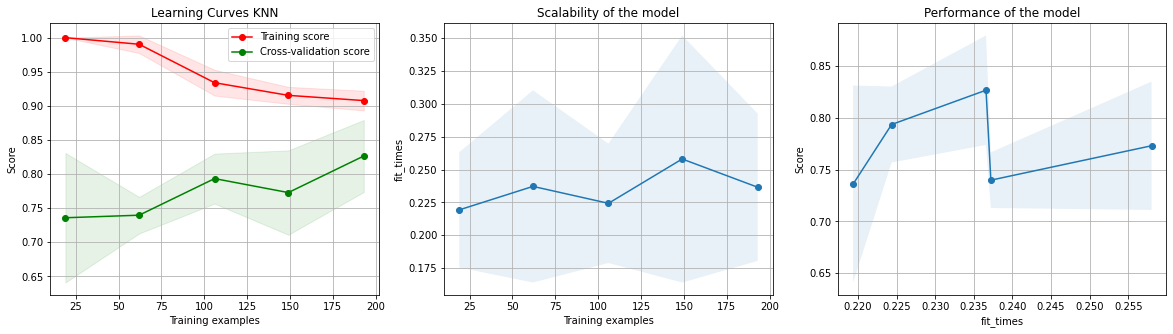

In [49]:
plot_learning_curve(loaded_best_estimator_rf_round1, 'Learning Curves KNN', X_train, y_train, n_jobs=-1)

In [50]:
#let's check the train scores
print(loaded_best_estimator_rf_round1.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_rf_round1.best_score_)

0.8760330578512396
0.8347789115646258


### From the above two models, model 2 with random forest is having better cross validation score. So I will recommend this model to be used on test data.

In [52]:
# Predictions on test data
print(f'Test data accuracy : {loaded_complete_grid_rf_round1 .score(X_test,y_test)}')

Test data accuracy : 0.9016393442622951
